# When Grit Is Bliss... #

## An exercise in visualization reverse-engineering ##

#### ...or: I want one just like that! ####


## Quest: How to reproduce the SVG 6_sigma_normal_distribution figure of Wikipedia? ##
            
This SVG rendering of the Normal distribution 
<img src=" https://commons.wikimedia.org/wiki/File:6_Sigma_Normal_distribution.svg", align='left'/> 
was created by Wikipedian extraordinaire 
<a style="text-decoration:none" 
    target="_blank"
    href="https://en.wikipedia.org/wiki/User:Cmglee/Dynamic_SVG_for_Wikimedia_projects">Cmglee</a>:

<img src="img\6_Sigma_Normal_distribution.svg.png", align='left'/> 

### Specifications ###

A. Axes:
    1. x and y axes only, with y-axis positioned at x=0 (:: no Spines on left, top or tight sides);
    2. x-axis range: -6.5 to 6.5
    3. ticks interval: major at every integer (x-axis) or at every tenth (y-axis);
                       minors at the half-point and each tenth;
    4. x-ticks: tick-marks below the axis line
        
B. Curves: The figure displays 3 Gaussian distributions centered at different values representing the shifted mean (shift=1.5):
    1. N1(\mu = 0):         green line and fill
    2. N2(\mu(N1) + shift): red   ~
    3. N3(\mu(N1) - shift): blue  ~

C. Lines: vertical lines under each curve appear at:
    1. \mu:            dashed line
    2. \mu +/- \sigma: dotted line

D. Vertical lines at specific, extreme points:
    1. Upper and lower specification limits: USL and LSL or 6 and -6 respectively (purple)
    2. Right of USL and left of LSL at ~+/- 6.4 (light purple) 

E. Annotations:
    1. Last point of y-axis labelled "\phi(x){last_point}"
    2. Each line listed in C. is annoted with label of the same curve line-color
    3. Lines listed in D.2 bear a descriptive text at (~+/- 6.4, last_point) with this format:
       i.   A header: "Fraction of area" + "left of LSL" [or + "right of USL" ] (+ \n ?)
       ii.  A 'text body' comprised of three lines showing the values of the fractional area beyond USL/LSL for each curve
       iii. The annotations for each line are positioned inside the plot 
            (:: left of the upper limit line, right of the lower limit)
    4. A legend-like box displays the "Total fraction beyond 6\sigma" for each curve with same scheme as in E.3


### My solution (with the python 3. code following): ###
<img src="img\My Normal Distribution Fig.svg", align='left'/> 

In [1]:
%matplotlib inline

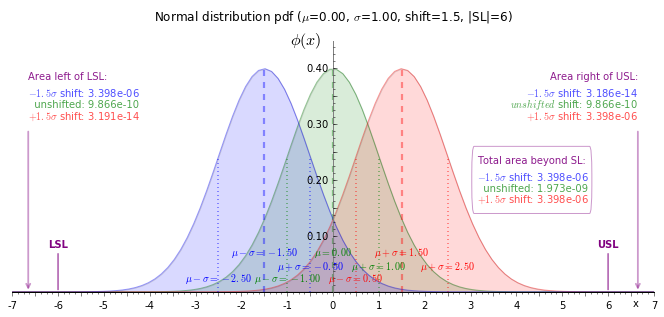

In [4]:
"""
   This procedure reproduces this Wikipedia image with high fidelity:
   https://commons.wikimedia.org/wiki/File:6_Sigma_Normal_distribution.svg
   At that resolution, the matching figure size is figsize=(11.5, 4.5).

   CAVEAT: The annotations and box placements are optimized for N(0,1).
   
   TO DO?: Convert the scientific notation to 'n x 10^m' as in original picture.

   catchenal@gmail.com
"""

def plotNSigmaNormals( mu=0, sigma=1, shift=1.5, SL=6, save=False ):
    """
    # mu = 0; sigma = 1 : mean and standard deviation 
    # shift = 1.5 : for the plotting of the shifted distributions
    # SL=6 : |special limit point|; used to calculate the cdf at lsl and usl
    
    """
    N = 100
    x_majloc = 0.5*sigma  # :: base for the x-axis MultipleLocator
    
    # Compute the past-extreme location for arrow placement:
    lsl, usl = mu - SL*sigma, mu + SL*sigma      # :: the '6-sigma' extremes
    
    beg = lsl - 1 # :: for x-axis range resizing 
    end = usl + 1
    
    # the last index of the dict value is used for extreme (SL=special limit) points labeling
    shift1 = '+{:.1f}\sigma'.format(shift)
    shift2 = '-{:.1f}\sigma'.format(shift)
    
    switch = { -1:['b', '\mu-\sigma=', shift2], 
                0:['g', '\mu=', 'unshifted'], 
                1:['r', '\mu+\sigma=', shift1] }
    
    limits_col = 'purple'
    fill_transpcy = 0.15
    line_transpcy = 0.40
    
    fig = plt.figure(1, figsize=(11.5, 4.5))
    
    plt.title( 'Normal distribution pdf (' + 
                '$\mu$={:.2f}, $\sigma$={:.2f}, shift={:.1f}, |SL|={:.0f})\n'.format( mu, sigma, shift, SL ))
    
    axes = plt.subplot(111)
    
    x1 = sp.linspace( start=beg, stop=end, num=N)
    
    def formannotate( sf='', v1='x', v2=0, x=0, y=0, xytxt=(1, 1), 
                      colr='k', hal='left', multialign='right', a=1 ):
        
        # sf: format_str with 2 placholders
        s = sf.format( v1, v2 ) # value1, value2
        axes.annotate( s, xy=( x, y ), xycoords='data',
                       xytext=xytxt, textcoords='data', color=colr,
                       ha=hal, multialignment=multialign, alpha=a )
    
    for k in switch.keys():
        
        mean = mu + k*shift*sigma
        
        col = switch[k][0]
        
        y0 = stats.norm( loc=mean, scale=sigma )
        y = y0.pdf( x1 )
        
        plt.plot( x1, y, color=col, alpha=line_transpcy, label=switch[k][2] )
        plt.gca().fill_between( x1, y, facecolor=col, alpha=fill_transpcy )
            
        # dashed vline at mu
        plt.plot( [mean, mean], [0, max(y)], ls='--', color=col, linewidth=2.2, alpha=line_transpcy, zorder=2 )
        
        # label @ mu
        formannotate( sf='${:s}{:.2f}$', v1=switch[k][1], v2=mean, 
                      x=mean, y=0.065, xytxt=( mean, 0.065 ), hal='center', colr=col ) 
        
        # dotted vline at mu+sigma
        mu_plus = mean + sigma
        y_plus = y0.pdf( mu_plus )
        plt.plot( [mu_plus, mu_plus], [0.0, y_plus ], ls=':', color=col, linewidth=2, alpha=line_transpcy, zorder=2 )
        
        # label @ mu_plus
        formannotate( sf='${:s}{:.2f}$', v1=switch[1][1], v2=mu_plus, 
                      x=mu_plus, y=0.04, xytxt=( mu_plus, 0.04 ), hal='center', colr=col ) 

        # dotted vline at mu-sigma    
        mu_minus = mean - sigma
        y_minus = y0.pdf( mu_minus )
        plt.plot( [mu_minus, mu_minus], [0.0, y_minus], ls=':', color=col, linewidth=2, alpha=line_transpcy, zorder=2)
        
        # label @ mu_minus
        formannotate( sf='${:s}{:.2f}$', v1=switch[-1][1], v2=mu_minus, 
                      x=mu_minus, y=0.02, xytxt=( mu_minus, 0.02 ), hal='center', colr=col ) 

        # Calc SL values to build the stacked text above each extreme pt:
        if k == -1:
            cdf1 = stats.norm( loc=-shift, scale=sigma ).cdf( x= lsl)
            cdf4 = 1 - stats.norm( loc=-shift, scale=sigma ).cdf( x= usl)
        elif k == 0:
            cdf2 = stats.norm( loc=0, scale=sigma ).cdf( x= lsl) 
            cdf5 = 1 - stats.norm( loc=0, scale=sigma ).cdf( x= usl)
        else:
            cdf3 = stats.norm( loc=shift, scale=sigma ).cdf( x= lsl)
            cdf6 = 1 - stats.norm( loc=shift, scale=sigma ).cdf( x= usl)
            
    top0 = 0.38
    # left-side annotations:
    axes.annotate( 'Area left of LSL:', xy=( beg*0.95, 0.0), xycoords='data',
                                        xytext=( beg*0.95, top0), textcoords='data',
                                        ha='left', color=limits_col, alpha=0.9 )

    formannotate( '${:s}$ shift: {:.3e}', switch[-1][2], cdf1, 
                  x=beg*0.95, y=0.0, xytxt=( beg*0.95, top0-0.03 ), colr=switch[-1][0], a=0.7 ) 

    formannotate( '  {:s}: {:.3e}', switch[0][2], cdf2, 
                  x=beg*0.95, y=0.0, xytxt=( beg*0.95, top0-0.05 ), colr=switch[0][0], a=0.7 )   

    formannotate( '${:s}$ shift: {:.3e}', switch[1][2], cdf3, 
                  x=beg*0.95, y=0.0, xytxt=( beg*0.95, top0-0.07 ), colr=switch[1][0], a=0.7 ) 
                  
    # place arrows
    axes.annotate( '', xy=( beg*0.95, 0.0), xycoords='data',
                    xytext=( beg*0.95, top0-0.09), textcoords='data',
                    weight='bold', ha='center', color=limits_col,
                    arrowprops=dict( arrowstyle='->',
                                     connectionstyle='arc3',
                                     color=limits_col, alpha=line_transpcy, linewidth=1.8 ) )
    
    axes.annotate( 'LSL', xy=( lsl, 0.0), xycoords='data',
                    xytext=( lsl, 0.08), textcoords='data',
                    weight='bold', ha='center', color=limits_col,
                    arrowprops=dict( arrowstyle='-',
                                     connectionstyle="arc3",
                                     color=limits_col ) )
                        
    axes.annotate( 'USL', xy=( usl, 0.0), xycoords='data',
                    xytext=( usl, 0.08), textcoords='data',
                    weight='bold', ha='center', color=limits_col,
                    arrowprops=dict( arrowstyle='-',
                                     connectionstyle="arc3",
                                     color=limits_col ) )
 
    # right-side annotations:
    axes.annotate( 'Area right of USL:', xy=( end*0.95, 0.0), xycoords='data',
                                         xytext=( end*0.95, top0), textcoords='data',
                                         ha='right', color=limits_col, alpha=0.9 )

    formannotate( '${:s}$ shift: {:.3e}', switch[-1][2], cdf4, 
                  x=end*0.95, y=0.0, xytxt=( end*0.95, top0-0.03 ), colr=switch[-1][0], a=0.7, hal='right' ) 

    formannotate( '${:s}$ shift: {:.3e}', switch[0][2], cdf5, 
                  x=end*0.95, y=0.0, xytxt=( end*0.95, top0-0.05 ), colr=switch[0][0], a=0.7, hal='right' )               

    formannotate( '${:s}$ shift: {:.3e}', switch[1][2], cdf6, 
                  x=end*0.95, y=0.0, xytxt=( end*0.95, top0-0.07 ), colr=switch[1][0], a=0.7, hal='right' )
    
    # place arrow
    axes.annotate( '', xy=( end*0.95, 0.0), xycoords='data',
                    xytext=( end*0.95, top0-0.09), textcoords='data',
                    weight='bold', ha='center', color=limits_col, 
                    arrowprops=dict( arrowstyle='->',
                                     connectionstyle='arc3',
                                     color=limits_col, alpha=line_transpcy, linewidth=1.8 ) )
    
    # create the borded box:
    #...................................................................
    l0 = stats.norm( loc=shift*sigma+0.5, scale=sigma ).ppf( 0.85 )
    l1 = l0 + 2.6

    h0 = 0.15
    h1 = h0 + 0.1
    
    bb = Bbox( [ [l0,h0], [l1,h1] ] )
    fbx = FancyBboxPatch( (bb.xmin, bb.ymin), abs(bb.width), abs(bb.height),
                          boxstyle='round, pad=0.01, rounding_size=0.05', 
                          linewidth=1, alpha=line_transpcy, zorder=1, 
                          ec=limits_col, fc='none')
    axes.add_patch(fbx)
    
    # Create text (to overlap the box):
    dx = l0 + 0.1
    dy = bb.ymax - 0.02
    
    axes.annotate( 'Total area beyond SL:', xy=(dx, dy), xycoords='data',
                                         xytext=(dx, dy), textcoords='data',
                                         ha='left', color=limits_col, alpha=0.9 )

    formannotate( '${:s}$ shift: {:.3e}', switch[-1][2], cdf1+cdf4, 
                  x=dx, y=dy, xytxt=( dx, dy-0.03 ), colr=switch[-1][0], a=0.7 )

    formannotate( '  {:s}: {:.3e}', switch[0][2], cdf2+cdf5, 
                  x=dx, y=dy, xytxt=( dx, dy-0.05 ), colr=switch[0][0], a=0.7 )
    
    formannotate( '${:s}$ shift: {:.3e}', switch[1][2], cdf3+cdf6, 
                  x=dx, y=dy, xytxt=( dx, dy-0.07 ), colr=switch[1][0], a=0.7 )
    
    
    axes.spines['left'].set_position( ('data', mu) )
    axes.spines['left'].set_color( (0.5, 0.5, 0.5) )
    
    axes.set_xlim( beg, end)
    
    Ylim = max(y)
    axes.set_ylim( 0, Ylim + 0.05)
    
    # whole_xtick and whole_ytick: label the axes with a 'ruler style'
    # x-axis manips
    def whole_xtick(x, pos):
        if not (x % 1.0) :
            return '{:.0f}'.format(x )
        return ''
    
    # y-axis manips
    def whole_ytick(x, pos):
        # The rounded expression in use here is a workaround a numpy(scipy).mod bug:
        # <n,s>p.<mod,remainder>( 0.5, 0.1) == sp.mod( 0.9, 0.1) == 0.099999999999999978
        # Note: only works bc range < 0.5.
        # Excludes 0 for vertical axis since already displayed on x-axis
        if not (x==0):
            if  not round(sp.mod( x, 0.1), 3):
                return '{:.2f}'.format(x )
            return ''
        return ''   
     
    axes.xaxis.set_major_locator( MultipleLocator(base=x_majloc) )
    axes.xaxis.set_major_formatter( FuncFormatter(whole_xtick) )
    axes.xaxis.set_minor_locator( AutoMinorLocator(4) )
    
    axes.yaxis.set_major_locator( MultipleLocator(base=0.05) )
    axes.yaxis.set_major_formatter( FuncFormatter(whole_ytick) )
    axes.yaxis.set_minor_locator( AutoMinorLocator(4) )
    
    # To annotate the last labeled pt on major x-tick:
    axes.text( end*0.95, -0.03, 'x ', fontsize=10,
               horizontalalignment='center', verticalalignment='bottom', 
               bbox=dict(fc='w', ec='none', pad=0.0) )
    
    # To annotate the second to last labeled pt on major y-tick:
    axes.text( mu-0.5*x_majloc, axes.yaxis.get_ticklocs()[-1], '$\phi(x)$', 
               weight='bold', fontsize=16, ha='right', 
               horizontalalignment='right', verticalalignment='center')
    
    # remove top/right spines
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
        
    # set ticks off
    plt.tick_params( top='off', right='off' , which='both' )
    plt.tick_params( 'x', which='both', direction='out' )
    
    plt.show()
    
    if save:
         fig.savefig( filename='img/My {:d}_sigma Normal Dist Fig.svg'.format(SL), dpi=512, 
                      orientation='landscape', transparent=True, frameon=None, bbox_inches='tight')

if __name__ == '__main__':
    # import libs:
    import scipy as sp
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
    from matplotlib.transforms import Bbox
    from matplotlib.patches import FancyBboxPatch

    # assign arguments:   
    mu = 0.; sigma = 1; shift = 1.5;  SL = 6    # 0, 1, 1.5, 6 == default vals
    save = True
    
    # Call plotting function: 
    plotNSigmaNormals( mu, sigma, shift, SL, save )